In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.isolver import * 
from trajectory.planner import * 

j = Joint(5_000, 50_000)



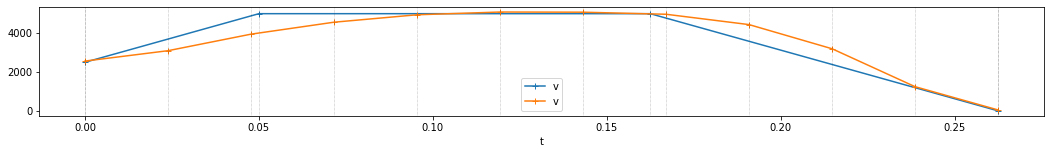

In [2]:
from trajectory.gsolver import ACDBlock

j = Joint(5000, 50_000)
x =  1000
v_0 = 2500
v_1 = 0   

self = ACDBlock(x,v_0=v_0,v_1=v_1, joint=j).init()

jd = ipsplit(x, t=self.t,j=j)
al = jd.make_add_limits(v_0, v_1)

l = ipsolve(jd, x, v_0, v_1, err_f=err_f)


ax = plot_trajectory(self.dataframe)
ax = plot_trajectory(ipdataframe(jd,al(l)), ax=ax)
plt.show()


/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 4 discontinuities in axis 0
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")
/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 4 discontinuities in axis 1
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")


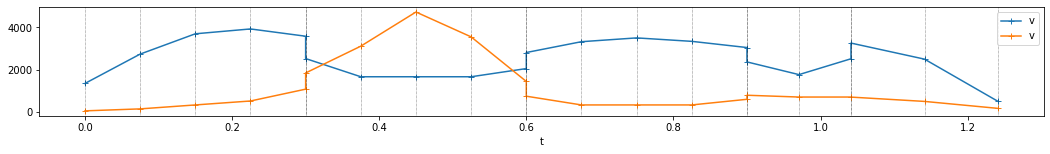

In [330]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)
x = 1000
s = sl.move([x,x/10])
s = sl.move([x/2,x])
s = sl.move([x,x/10])
s = sl.move([x/4,x/10])
s = sl.move([x/2,x/10])

sl.plot()

((16, 2), (6, 2))

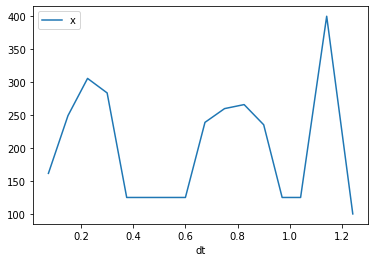

In [332]:
rows = []
for s_i, s in enumerate(sl):
    for ax_i, ax in enumerate(s.axes):
        for x in ax.slices:
            rows.append(dict(s=s_i, ax=ax_i, dt=ax.split_info.dt,x=x))

df = pd.DataFrame(rows)
t = df[df.ax==0][['dt','x']]
t['dt'] = t.dt.cumsum()
t.set_index('dt').plot()
t.values.shape, cv.shape    

In [326]:
import numpy as np
import scipy.interpolate as si
def scipy_bspline(cv, n=100, degree=4, periodic=False):

    cv = np.asarray(cv)
    count = cv.shape[0]
    degree = np.clip(degree,1,count-1)
    
    kv = np.clip(np.arange(count+degree+1)-degree,0,count-degree)

    max_param = count - degree 
    spl = si.BSpline(kv, cv, degree)
  
    print(max_param)

    return spl, spl(np.linspace(0,max_param,n))

v = t[['dt','x']].copy()
%time spl, p = scipy_bspline(v.values, n=len(t)*10, degree=3, periodic=False)

idx = np.searchsorted(p[:,0], v.values[:,0])
v['sb'] =  p[idx,1]
 
    
fig, axes = plt.subplots(1, figsize=(12,4))
x,y = p.T
#axes.plot(x,y,'k+-')
#axes.plot(v.dt,v.x, 'bo--')
axes.plot(v.dt,v.sb ,'g-')

167
CPU times: user 675 µs, sys: 369 µs, total: 1.04 ms
Wall time: 732 µs


In [ ]:
self.dataframe

array([[1.00000000e-01, 1.55222140e+02],
       [2.29473706e-01, 4.32543592e+02],
       [3.08415621e-01, 5.03458412e+02],
       [4.20191059e-01, 5.33144848e+02],
       [5.06283709e-01, 5.37056241e+02],
       [6.11894973e-01, 5.37390588e+02],
       [7.01315332e-01, 5.37302248e+02],
       [8.07854952e-01, 5.33216540e+02],
       [9.10202525e-01, 5.01752896e+02],
       [1.01224490e+00, 3.89939452e+02],
       [1.11428571e+00, 2.07853000e+02],
       [1.21632653e+00, 8.08303971e+01],
       [1.31836735e+00, 4.75153119e+01],
       [1.42040816e+00, 4.54610681e+01],
       [1.52244898e+00, 4.54545441e+01],
       [1.62448980e+00, 4.54545524e+01],
       [1.70102041e+00, 4.54545572e+01],
       [1.80306122e+00, 4.54545495e+01],
       [1.90510204e+00, 4.54545433e+01],
       [2.00714286e+00, 4.54818778e+01],
       [2.10918367e+00, 4.83440891e+01],
       [2.21126627e+00, 8.59656861e+01],
       [2.31691432e+00, 2.44720750e+02],
       [2.41172948e+00, 4.14711950e+02],
       [2.524727

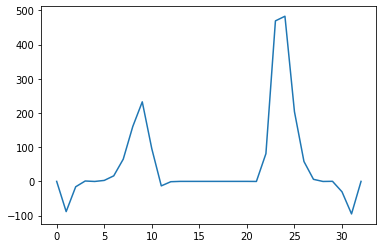

In [124]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
x = np.hstack((t.values, p))
plt.plot(x[:,1]-x[:,3])

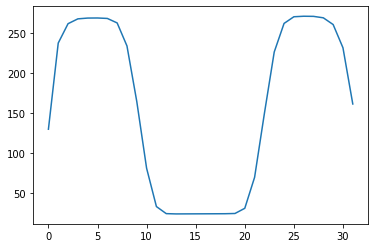

32